# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополненительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайте ниже будут подсказки как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [2]:
import tensorflow as tf
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

####Вспомогательный код

In [45]:
#@title 
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

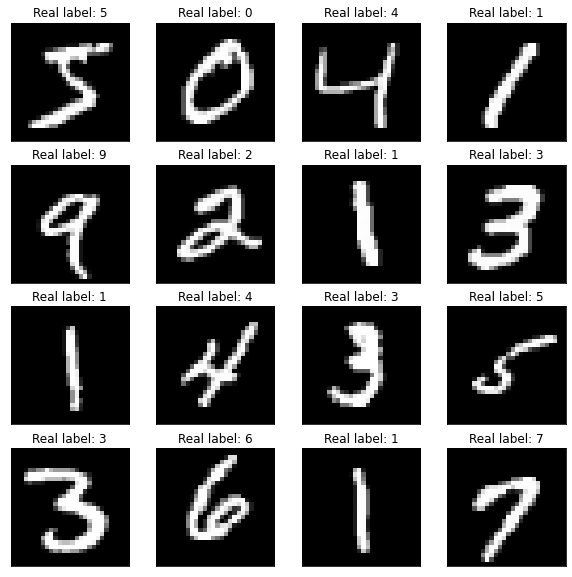

In [19]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)


In [5]:
# прикрепим ваш гугл диск к виртуальной машине
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку, 
# измените путь согласно ! ls "/content/drive/"

path = Path("/content/drive/My Drive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"  
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [41]:
# < YOUR CODE STARTS HERE >
from tensorflow.keras.layers import Dense, Flatten

model = tf.keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='accuracy', verbose=5, save_best_only=True, mode='max')

history = model.fit(x_train, y_train, epochs=20, verbose=2, callbacks=[checkpoint])

# < YOUR CODE ENDS HERE >

Epoch 1/20
1875/1875 - 3s - loss: 0.2429 - accuracy: 0.9287

Epoch 00001: accuracy improved from -inf to 0.92873, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5
Epoch 2/20
1875/1875 - 3s - loss: 0.1626 - accuracy: 0.9546

Epoch 00002: accuracy improved from 0.92873 to 0.95457, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5
Epoch 3/20
1875/1875 - 3s - loss: 0.1440 - accuracy: 0.9605

Epoch 00003: accuracy improved from 0.95457 to 0.96053, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5
Epoch 4/20
1875/1875 - 3s - loss: 0.1334 - accuracy: 0.9642

Epoch 00004: accuracy improved from 0.96053 to 0.96420, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5
Epoch 5/20
1875/1875 - 3s - loss: 0.1245 - accuracy: 0.9673

Epoch 00005: accuracy improved from 0.96420 to 0.96728, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5
Epoch 6/20
1875/1875 - 3s - 

In [33]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "accuracy" in history.history, "Please, provide validation_data in model.fit."
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

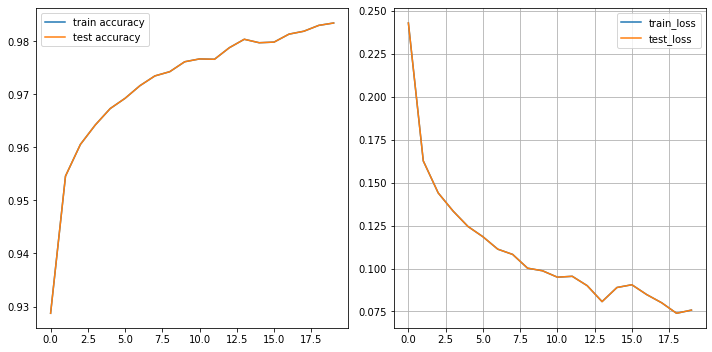

In [46]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [47]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.9670
Accuracy of restored model 96.70%


И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


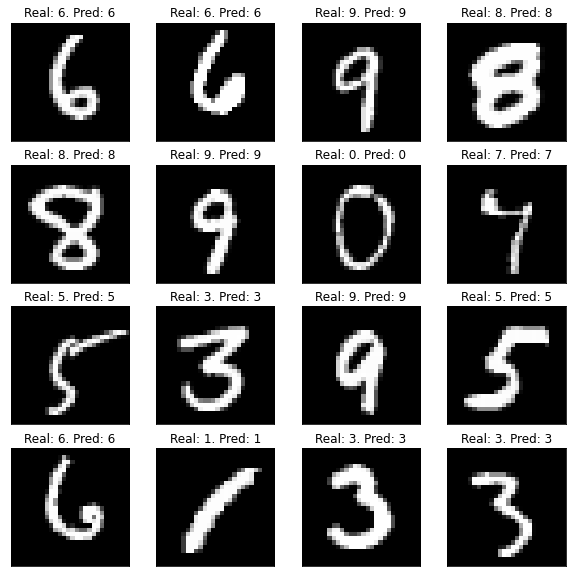

In [49]:
predicted_labels = restored_model.predict_classes(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs], y_test[idxs], predicted_labels[idxs])